<a href="https://colab.research.google.com/github/priyarameshd/python_fundamentals/blob/main/LinearRegression_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Predict delivery time using sorting time

In [ ]:
deliveryTime_df = pd.read_csv("delivery_time.csv")
deliveryTime_df.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### EDA and visualization

In [ ]:
deliveryTime_df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
deliveryTime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
deliveryTime_df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

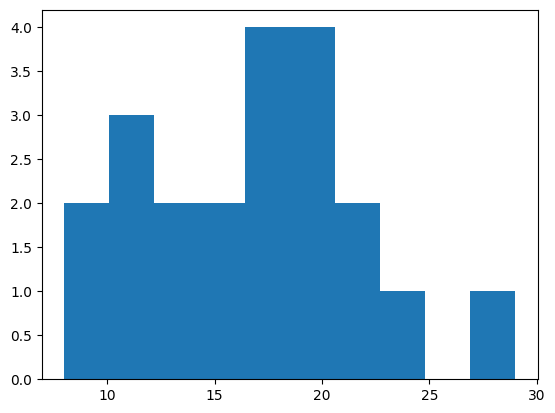

In [ ]:
plt.hist(deliveryTime_df['Delivery Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7ae25eee4a60>,
 'caps': [<matplotlib.lines.Line2D at 0x7ae25eee5ea0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ae260ff4f70>],
 'medians': [<matplotlib.lines.Line2D at 0x7ae25eee63e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ae25eee6680>],
 'means': []}

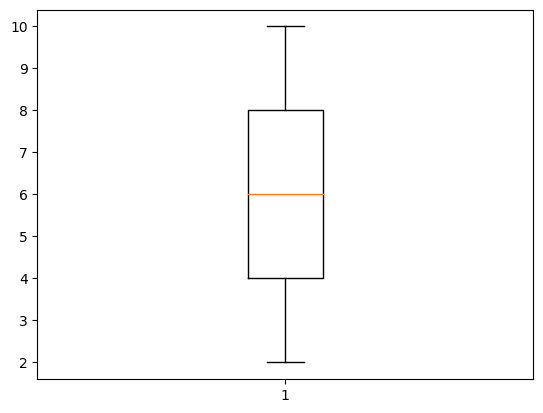

In [ ]:
plt.boxplot(deliveryTime_df['Sorting Time'])

Text(0, 0.5, 'Sorting Time')

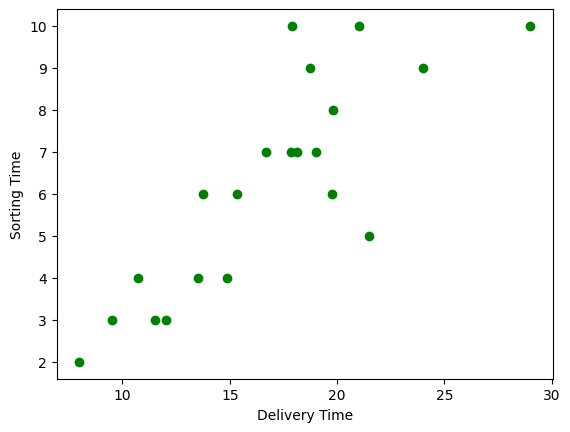

In [ ]:
plt.plot(deliveryTime_df['Delivery Time'],deliveryTime_df['Sorting Time'],"go")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")


In [ ]:
deliveryTime_df['Delivery Time'].corr(deliveryTime_df['Sorting Time'])

0.8259972607955326

In [ ]:
deliveryTime_df = deliveryTime_df.rename(columns={'Delivery Time':"DeliveryTime","Sorting Time":'SortingTime'})

In [ ]:
deliveryTime_df.head(5)

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Model Building and Testing

In [ ]:
import statsmodels.formula.api as smf
model1 = smf.ols("DeliveryTime~SortingTime",data=deliveryTime_df).fit()
model1.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [ ]:
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        06:43:55   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
deliveryTime_df.columns

Index(['DeliveryTime', 'SortingTime'], dtype='object')

R2 - > 0.682 i.e Accuracy is 68.2 .
Pvalue 0.000	< 0.05 SortingTime is a significant variable.
predict the data for entire dataset.

In [ ]:
predicted_deliverytime1 = model1.predict(pd.DataFrame(deliveryTime_df['SortingTime']))
predicted_deliverytime1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

finding error for entire data

In [ ]:
model1.resid


0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

find RootMeanSquareError

In [ ]:
rmse_lin = np.sqrt(np.mean((np.array(deliveryTime_df['DeliveryTime'])-np.array(predicted_deliverytime1))**2))
rmse_lin

2.7916503270617654

Text(0.5, 0, 'Sorting Time')

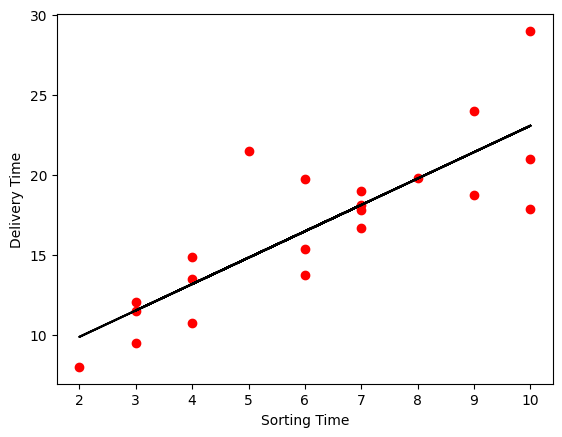

In [ ]:
import matplotlib.pylab as plt
plt.scatter(x=deliveryTime_df['SortingTime'],y=deliveryTime_df['DeliveryTime'],color='red')
plt.plot(deliveryTime_df['SortingTime'],predicted_deliverytime1,color='black')
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')

Apply transformations to improve the model

*   Log transformation



In [ ]:
model2 = smf.ols('DeliveryTime~np.log(SortingTime)',data=deliveryTime_df).fit()



In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           2.64e-06
Time:                        06:43:57   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

compare R2 value for both the models. model2 accuracy is 69.5 which is slightly better compared to model1.

In [ ]:
predicted_deliverytime2 = model2.predict(pd.DataFrame(deliveryTime_df['SortingTime']))
predicted_deliverytime2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [ ]:
print(model2.params)
print(model2.resid)

Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64
0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64


In [ ]:
rmse_log = np.sqrt(np.mean((np.array(deliveryTime_df['DeliveryTime'])-np.array(predicted_deliverytime2))**2))
rmse_log

2.733171476682066

In [ ]:
predicted_deliverytime2.corr(deliveryTime_df.SortingTime)

0.9774469985241836

Text(0.5, 0, 'Sorting Time')

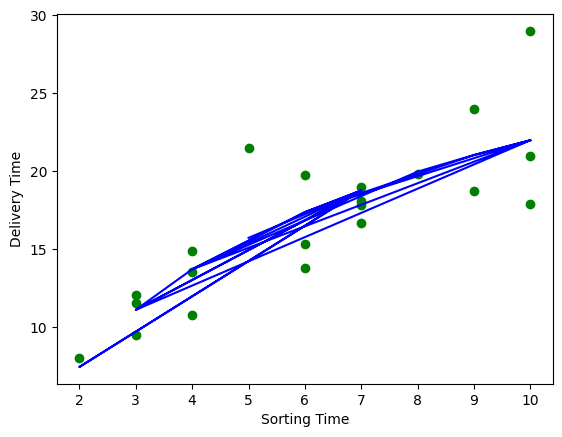

In [ ]:

plt.scatter(x=deliveryTime_df['SortingTime'],y=deliveryTime_df['DeliveryTime'],color='green')
plt.plot(deliveryTime_df['SortingTime'],predicted_deliverytime2,color='blue')
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')

*3rd* model exponential model

In [ ]:
model3 = smf.ols('np.log(DeliveryTime)~SortingTime',data=deliveryTime_df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Mon, 26 Feb 2024   Prob (F-statistic):           1.59e-06
Time:                          06:43:57   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Accuracy is 71.1 which is better comparing to prrevious models

In [ ]:
deltime_predicted_log = model3.predict(pd.DataFrame(deliveryTime_df['SortingTime']))

In [ ]:
deltime_predicted_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

converting log to orginal value

In [ ]:
predicted_deliverytime3 = np.exp(deltime_predicted_log)
predicted_deliverytime3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [ ]:
rmse_exp = np.sqrt(np.mean((np.array(deliveryTime_df['DeliveryTime'])-np.array(predicted_deliverytime3))**2))
rmse_exp

2.9402503230562007

Text(0.5, 0, 'Sorting Time')

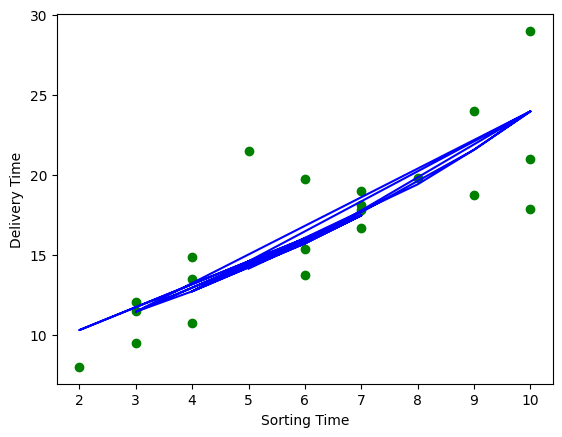

In [ ]:

plt.scatter(x=deliveryTime_df['SortingTime'],y=deliveryTime_df['DeliveryTime'],color='green')
plt.plot(deliveryTime_df['SortingTime'],predicted_deliverytime3,color='blue')
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')

In [ ]:
deltime_resid = model3.resid_pearson
deltime_resid

array([-0.75408795,  0.33675889,  1.3016092 ,  0.60797197,  1.08475764,
       -0.13425573,  0.47972269, -1.06383166, -1.66402537, -0.79839415,
        0.12198057, -0.9609301 , -0.26219179,  0.02461332,  0.28130094,
        0.89124014, -0.7613643 ,  0.20640995, -1.44153627,  0.11763994,
        2.38661208])

In [ ]:
deliveryTime_df["SortingTime_Sq"] = deliveryTime_df.SortingTime**2

In [ ]:
model4 = smf.ols('np.log(DeliveryTime)~SortingTime+SortingTime_Sq',data=deliveryTime_df).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Mon, 26 Feb 2024   Prob (F-statistic):           2.20e-06
Time:                          06:43:58   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.6997      0.228      7.441      0.000       1.220       2.180
SortingTime        0.2659      0.080      3.315      0.004       0.097       0.434
SortingTime_Sq    -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Accuracy 76.5

In [ ]:
deltime_predicted_log2 = model4.predict(deliveryTime_df)



In [ ]:
predicted_deliverytime4 = np.exp(deltime_predicted_log2)
predicted_deliverytime4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [ ]:
rmse_quad = np.sqrt(np.mean((np.array(deliveryTime_df['DeliveryTime'])-np.array(predicted_deliverytime4))**2))
rmse_quad

2.799041988740932

Text(0.5, 0, 'Sorting Time')

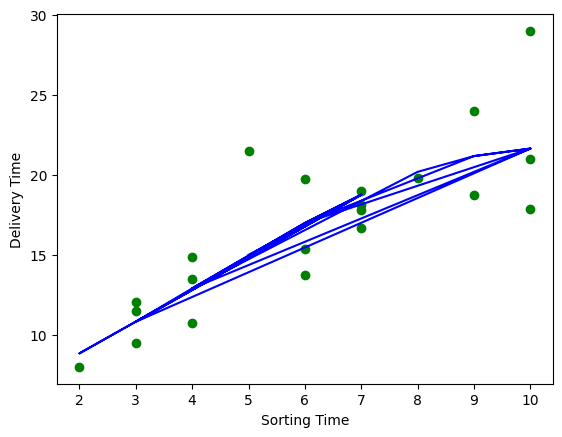

In [ ]:
plt.scatter(x=deliveryTime_df['SortingTime'],y=deliveryTime_df['DeliveryTime'],color='green')
plt.plot(deliveryTime_df['SortingTime'],predicted_deliverytime4,color='blue')
plt.ylabel('Delivery Time')
plt.xlabel('Sorting Time')

model4 is better comparing to other models. Model validation

In [ ]:
rmse_data = {"Model":pd.Series(["rmse_lin","rmse_log","rmse_exp","rmse_quad"]),
             "Values":pd.Series([rmse_lin,rmse_log,rmse_exp,rmse_quad]),
             "RSquared":pd.Series([model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
rmse_table = pd.DataFrame(rmse_data)
rmse_table

,Model,Values,RSquared
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_quad,2.799042,0.764867


In [ ]:
model4.resid_pearson

array([-0.18653701,  0.27510944,  0.92331151,  0.76937448,  1.79789238,
       -0.62623272,  0.0766711 , -0.80301506, -1.16851536, -0.74833548,
       -0.11118848, -1.12531927, -0.72398172,  0.37160353,  0.64861345,
        0.8734897 , -1.3029903 , -0.21828016, -0.61938087, -0.31407821,
        2.21178906])

(array([3., 5., 1., 4., 2., 2., 2., 0., 1., 1.]),
 array([-1.3029903 , -0.95151236, -0.60003442, -0.24855649,  0.10292145,
         0.45439938,  0.80587732,  1.15735525,  1.50883319,  1.86031113,
         2.21178906]),
 <BarContainer object of 10 artists>)

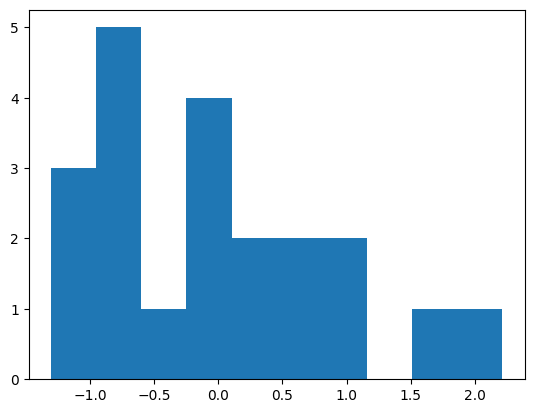

In [ ]:
plt.hist(model4.resid_pearson)

Text(0, 0.5, 'Standardized Residual')

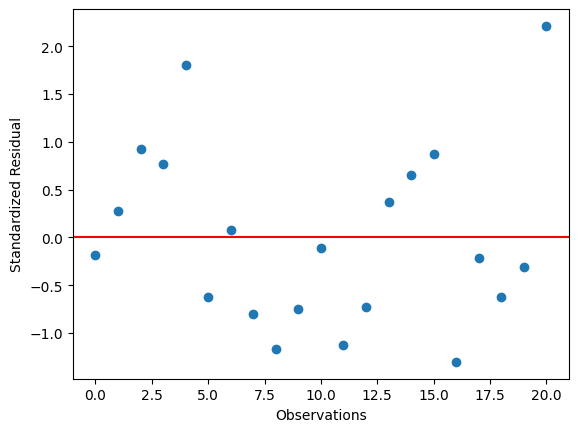

In [ ]:
plt.scatter(np.arange(21),model4.resid_pearson)
plt.axhline(y=0,color="red")

plt.xlabel("Observations")
plt.ylabel("Standardized Residual")

Model4 is the best model comparig to others.

In [ ]:
deliveryTime_df['predictedDeliveryTime'] = predicted_deliverytime4

In [ ]:
deliveryTime_df = deliveryTime_df.drop(columns='SortingTime_Sq')

In [ ]:
deliveryTime_df

,DeliveryTime,SortingTime,predictedDeliveryTime
0,21.00,10,21.646921
1,13.50,4,12.909227
2,19.75,6,16.995933
3,24.00,9,21.176938
4,29.00,10,21.646921
5,15.35,6,16.995933
6,19.00,7,18.764526
7,9.50,3,10.825502
8,17.90,10,21.646921
9,18.75,9,21.176938
